# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This study contains real data from a Portuguese bank that used its own contact-center to do directed marketing campaigns. They utilized 17 campaigns from May 2008 and November 2010. These campaigns were assocaited to a total of 79,354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [25]:
df.shape

(41188, 21)

In [26]:
# The dataframe consists of 21 columns with no null values
# 16 categorical columns and 5 numerical columns

In [130]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective of the task is to find a model that can describe the factors that influence the success of a deposit. This will provide the bank management a better understanding of how to allocate resources and select higher quality and potential customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [28]:
# dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [29]:
bank_info = df.iloc[:, 1:7]
y = df.iloc[:, -1:]

X = pd.get_dummies(bank_info.iloc[:,0:6])
X['age'] = df['age']
X.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,56
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,57
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,37
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,40
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,56


In [30]:
X['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [31]:
# splitting the data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30882 entries, 1975 to 15798
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_admin.                     30882 non-null  uint8
 1   job_blue-collar                30882 non-null  uint8
 2   job_entrepreneur               30882 non-null  uint8
 3   job_housemaid                  30882 non-null  uint8
 4   job_management                 30882 non-null  uint8
 5   job_retired                    30882 non-null  uint8
 6   job_self-employed              30882 non-null  uint8
 7   job_services                   30882 non-null  uint8
 8   job_student                    30882 non-null  uint8
 9   job_technician                 30882 non-null  uint8
 10  job_unemployed                 30882 non-null  uint8
 11  job_unknown                    30882 non-null  uint8
 12  marital_divorced               30882 non-null  uint8
 13  marital_marri

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

In [34]:
# baseline dummy classifier that our classifiers should aim to beat
dummy = DummyClassifier()
start = time()
dummy.fit(X_train, y_train)
stop = time()

dummy_time = stop - start
dummy_training_score = dummy.score(X_train, y_train)
dummy_test_score = dummy.score(X_test, y_test)
print("Training time: " + str(dummy_time))
print("baseline score on training data: " + str(dummy_training_score))
print("baseline score on testing data: " + str(dummy_test_score))

Training time: 0.010991573333740234
baseline score on training data: 0.8886406320834143
baseline score on testing data: 0.8834272391684477


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
# create a baseline model for LR
logr = LogisticRegression()
start = time()
logr.fit(X_train, y_train)
stop = time()

logr_time = stop - start
logr_training_score = logr.score(X_train, y_train)
logr_test_score = logr.score(X_test, y_test)

print("Training time: " + str(logr_time))
print("logistic regression score on training data: " + str(logr_training_score))
print("logistic regression score on testing data: " + str(logr_test_score))

C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 0.16165971755981445
logistic regression score on training data: 0.8886406320834143
logistic regression score on testing data: 0.8834272391684477


### Problem 9: Score the Model

What is the accuracy of your model?

The simple logistic regression model scored an accuracy of 0.89 and 0.88 for the training data and testing data, respectfully.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [37]:
# create a knn model to compare
knn = KNeighborsClassifier()
start = time()
knn.fit(X_train, y_train)
stop = time()

knn_time = stop - start
knn_training_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

print("Training time: " + str(knn_time))
print("knn score on training data: " + str(knn_training_score))
print("knn score on testing data: " + str(knn_test_score))

C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training time: 0.026022911071777344
knn score on training data: 0.8928178226798782
knn score on testing data: 0.8769185933553526


In [38]:
# creating a decision tree classifier to compare
tree = DecisionTreeClassifier()
start = time()
tree.fit(X_train, y_train)
stop = time()

tree_time = stop - start
tree_training_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)

print("Training time: " + str(tree_time))
print("tree score on training data: " + str(tree_training_score))
print("tree score on testing data: " + str(tree_test_score))

Training time: 0.11344075202941895
tree score on training data: 0.9176866783239428
tree score on testing data: 0.8639984456965223


In [39]:
# create a SVM model to compare
svc = svm.SVC(probability=True)
start = time()
svc.fit(X_train, y_train)
stop = time()

svc_time = stop - start
svc_training_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)

print("Training time: " + str(svc_time))
print("svc score on training data: " + str(svc_training_score))
print("svc score on testing data: " + str(svc_test_score))

C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 52.02146124839783
svc score on training data: 0.8886406320834143
svc score on testing data: 0.8834272391684477


In [40]:
res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', "SVM Model"],
            'Train Time': [logr_time, knn_time, tree_time, svc_time],
            'Train Accuracy': [logr_training_score, knn_training_score, tree_training_score, svc_training_score],
           'Test Accuracy': [logr_test_score, knn_test_score, tree_test_score, svc_test_score],
          }
results_df = pd.DataFrame(res_dict)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.161660,0.888641,0.883427
1,KNN,0.026023,0.892818,0.876919
2,Decision Tree,0.113441,0.917687,0.863998
3,SVM Model,52.021461,0.888641,0.883427


Based on the baseline values of these models, it seems that KNN has the quickest training time but decision trees have the highest training accuracy while logistic regression and svm have the highest testing accuracy.

Comparing the accuracy of the models using a ROC Curve Display

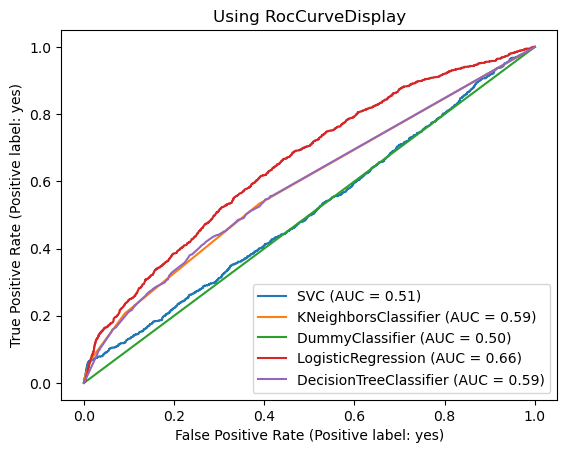

In [41]:
# Comparing values with another performance metric

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=svc_disp.ax_)
dummy_disp = RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=svc_disp.ax_)
logr_disp = RocCurveDisplay.from_estimator(logr, X_test, y_test, ax=svc_disp.ax_)
tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=svc_disp.ax_)
plt.title('Using RocCurveDisplay')
plt.legend();

In [42]:
dummy_auc = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
tree_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
logr_auc = roc_auc_score(y_test, logr.predict_proba(X_test)[:,1])

print("dummy auc score on testing data: " + str(dummy_auc))
print("svc auc score on testing data: " + str(svc_auc))
print("tree auc score on testing data: " + str(tree_auc))
print("knn auc score on testing data: " + str(knn_auc))
print("logr auc score on testing data: " + str(logr_auc))

dummy auc score on testing data: 0.5
svc auc score on testing data: 0.5122989975075142
tree auc score on testing data: 0.5907778480316693
knn auc score on testing data: 0.5899420405395498
logr auc score on testing data: 0.6553533007110915


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [43]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [106]:
# Using logistic regression as it has one of the highest testing accuracies
# Showcasing the feature importance with its baseline model
import numpy as np

importance = logr.coef_[0]
logr_importance = pd.DataFrame({"Feature": X.columns, 'Importance': importance})
logr_importance = logr_importance.set_index("Feature")
logr_importance = logr_importance.sort_values('Importance', ascending =  False)

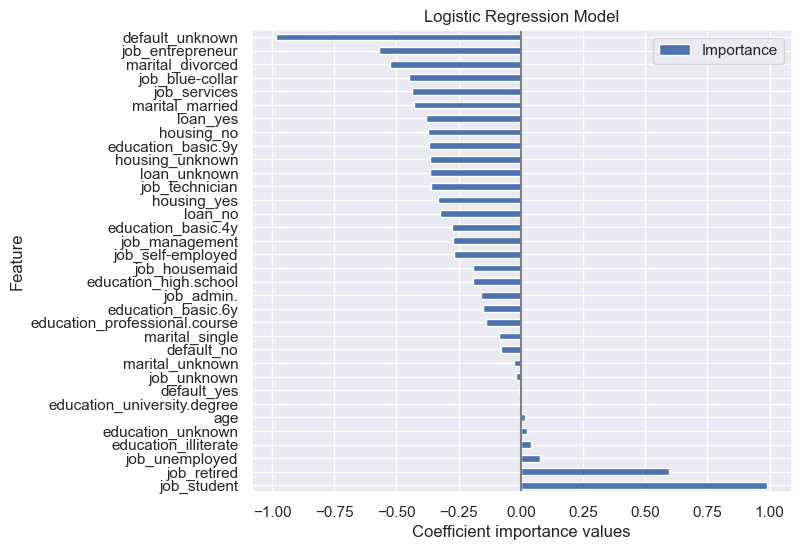

In [107]:
# plotting feature importance as a bar chart
logr_importance.plot.barh(figsize=(9, 6))
plt.title("Logistic Regression Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance values")
plt.subplots_adjust(left=0.3)

In [ ]:
# hyperparameter tuning for logistic regression 

# defining models and its parameters
logr_new_model = LogisticRegression()
params = {'solver': ['newton-cg','liblinear', 'lbfgs','sag','saga'],
         'penalty': ['l2'],
         'C' : [ 100, 10, 1.0, 0.1, 0.01, 0.001]}

# defining grid search paramaters
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
logr_search = GridSearchCV(estimator=logr_new_model, param_grid=params, n_jobs=-1, cv=cross_validation, scoring='accuracy')
logr_result = logr_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (logr_result.best_score_, logr_result.best_params_))
means = logr_result.cv_results_['mean_test_score']
stds = logr_result.cv_results_['std_test_score']
params = logr_result.cv_results_['params']

Logistic Regression: Best: 0.887337 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [19]:
# optimizing svc model

# defining models and its parameters
svc_new_model = SVC(max_iter = 1000)
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}
# gamma = [1, 0.1] #, 0.01, 0.001]
# c_values = [100] #, 10, 1.0, 0.1, 0.01]
# kernels = ['linear'] #, 'rbf']

# defining grid search paramaters
# cross_validation = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
svc_search = GridSearchCV(estimator=svc_new_model, param_grid=params, n_jobs=-1, scoring='accuracy' )
svc_result = svc_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (svc_result.best_score_, svc_result.best_params_))
means = svc_result.cv_results_['mean_test_score']
stds = svc_result.cv_results_['std_test_score']
params = svc_result.cv_results_['params']    
    
    

Best: 0.886099 using {'gamma': 1.0, 'kernel': 'rbf'}


C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Best: 0.886099 using {'gamma': 1.0, 'kernel': 'rbf'}

In [47]:
# optimizing decision tree model

# defining models and its parameters
tree_new_model = DecisionTreeClassifier()
params = {'max_depth': [2,3,5,10,15,20],
         'min_sample_leaf': [5,10,20,40],
         'criterion' : ['gini', 'entropy']}

# defining grid search paramaters
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
tree_search = GridSearchCV(estimator=tree_new_model, param_grid= params, n_jobs=-1, cv=cross_validation, scoring='accuracy')
tree_result = tree_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (tree_result.best_score_, tree_result.best_params_))
means = tree_result.cv_results_['mean_test_score']
stds = tree_result.cv_results_['std_test_score']
params = tree_result.cv_results_['params']    
    


Best: 0.887240 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}


Decision Tree: Best: 0.887240 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}

In [ ]:
# optimizing knn model

# defining models and its parameters
knn_new_model = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 7),
         'weights': ['uniform', 'distance'],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'p' : [1,2]}

# defining grid search paramaters
knn_grid = dict(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm, p = p)
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
knn_search = GridSearchCV(estimator=knn_new_model, param_grid= knn_grid, n_jobs=-1, cv=cross_validation, scoring='accuracy')
knn_result = knn_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (knn_result.best_score_, knn_result.best_params_))
means = knn_result.cv_results_['mean_test_score']
stds = knn_result.cv_results_['std_test_score']
params = knn_result.cv_results_['params']    
    

KNN: Best: 0.886181 using {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

# Running the tuned models

In [50]:
tuned_LR = LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs')

start = time()
tuned_LR.fit(X_train, y_train)
stop = time()

tuned_LR_time = stop - start
tuned_LR_training_score = tuned_LR.score(X_train, y_train)
tuned_LR_test_score = tuned_LR.score(X_test, y_test)

print("Training time: " + str(tuned_LR_time))
print("logistic regression score on training data: " + str(tuned_LR_training_score))
print("logistic regression score on testing data: " + str(tuned_LR_test_score))
                              

Training time: 0.14913654327392578
logistic regression score on training data: 0.8886406320834143
logistic regression score on testing data: 0.8834272391684477


C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
tuned_SVM = SVC(gamma = 1.0, kernel = 'rbf')

start = time()
tuned_SVM.fit(X_train, y_train)
stop = time()

tuned_SVM_time = stop - start
tuned_SVM_training_score = tuned_SVM.score(X_train, y_train)
tuned_SVM_test_score = tuned_SVM.score(X_test, y_test)

print("Training time: " + str(tuned_SVM_time))
print("SVM score on training data: " + str(tuned_SVM_training_score))
print("SVM score on testing data: " + str(tuned_SVM_test_score))
                              



C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 49.70608973503113
SVM score on training data: 0.9060941648856939
SVM score on testing data: 0.8824557994948514


In [52]:
tuned_DT = DecisionTreeClassifier(criterion =  'entropy', max_depth = 3, min_samples_leaf = 20)

start = time()
tuned_DT.fit(X_train, y_train)
stop = time()

tuned_DT_time = stop - start
tuned_DT_training_score = tuned_DT.score(X_train, y_train)
tuned_DT_test_score = tuned_DT.score(X_test, y_test)

print("Training time: " + str(tuned_DT_time))
print("Deciosion Tree score on training data: " + str(tuned_DT_training_score))
print("Decision Tree score on testing data: " + str(tuned_DT_test_score))
                              

Training time: 0.0520477294921875
Deciosion Tree score on training data: 0.8891911145651188
Decision Tree score on testing data: 0.8830386632990092


In [53]:
tuned_KNN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 6, p = 1, weights = 'uniform')

start = time()
tuned_KNN.fit(X_train, y_train)
stop = time()

tuned_KNN_time = stop - start
tuned_KNN_training_score = tuned_KNN.score(X_train, y_train)
tuned_KNN_test_score = tuned_KNN.score(X_test, y_test)

print("Training time: " + str(tuned_KNN_time))
print("KNN score on training data: " + str(tuned_KNN_training_score))
print("KNN score on testing data: " + str(tuned_KNN_test_score))
                              

C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training time: 0.17515969276428223
KNN score on training data: 0.891393044491937
KNN score on testing data: 0.8819700796580532


# Overall Results

In [55]:
tuned_dict = {'Model': ['Tuned Logistic Regression', 'Tuned KNN', 'Tuned Decision Tree', "Tuned SVM Model"],
            'Train Time': [tuned_LR_time, tuned_KNN_time, tuned_DT_time, tuned_SVM_time],
            'Train Accuracy': [tuned_LR_training_score, tuned_KNN_training_score, tuned_DT_training_score, tuned_SVM_training_score],
           'Test Accuracy': [logr_test_score, tuned_KNN_test_score, tuned_DT_test_score, tuned_SVM_test_score],
          }
tuned_df = pd.DataFrame(tuned_dict)
tuned_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Tuned Logistic Regression,0.149137,0.888641,0.883427
1,Tuned KNN,0.175160,0.891393,0.881970
2,Tuned Decision Tree,0.052048,0.889191,0.883039
3,Tuned SVM Model,49.706090,0.906094,0.882456


In [63]:
# Comparing accuracy training and accuracy test scores between baseline models and optimized models
total_df = pd.concat([results_df,tuned_df])
total_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.161660,0.888641,0.883427
1,KNN,0.026023,0.892818,0.876919
2,Decision Tree,0.113441,0.917687,0.863998
3,SVM Model,52.021461,0.888641,0.883427
0,Tuned Logistic Regression,0.149137,0.888641,0.883427
1,Tuned KNN,0.175160,0.891393,0.881970
2,Tuned Decision Tree,0.052048,0.889191,0.883039
3,Tuned SVM Model,49.706090,0.906094,0.882456


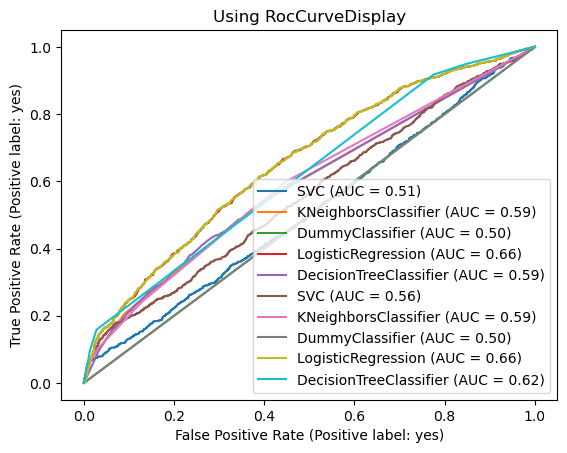

In [65]:
#Comparing ROC and AUC values between baseline models and optimized models

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=svc_disp.ax_)
dummy_disp = RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=svc_disp.ax_)
logr_disp = RocCurveDisplay.from_estimator(logr, X_test, y_test, ax=svc_disp.ax_)
tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=svc_disp.ax_)

svc2_disp = RocCurveDisplay.from_estimator(tuned_SVM, X_test, y_test, ax=svc_disp.ax_)
knn2_disp = RocCurveDisplay.from_estimator(tuned_KNN, X_test, y_test, ax=svc_disp.ax_)
dummy2_disp = RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=svc_disp.ax_)
logr2_disp = RocCurveDisplay.from_estimator(tuned_LR, X_test, y_test, ax=svc_disp.ax_)
tree2_disp = RocCurveDisplay.from_estimator(tuned_DT, X_test, y_test, ax=svc_disp.ax_)
plt.title('Using RocCurveDisplay')
plt.legend();

# Determining most important features

Logistic regression and decision trees both have the option to showcasing which features had the greatest importance while the model was training and testing. This will be important for the study to see what type of people should be targeted in the marketing campaigns.

In [110]:
# Tuned Logistic Regression Feature Importance

tuned_logr_importance = tuned_LR.coef_[0]
tuned_logr_df = pd.DataFrame({"Feature": X.columns, 'Importance': tuned_logr_importance})
tuned_logr_df = tuned_logr_df.set_index("Feature")
tuned_logr_df = tuned_logr_df.sort_values('Importance', ascending =  False)
tuned_logr_df

,Importance
Feature,
job_student,1.006921
job_retired,0.591570
job_unemployed,0.077363
education_illiterate,0.044916
education_unknown,0.018487
age,0.015300
education_university.degree,-0.005365
default_yes,-0.010652
job_unknown,-0.019833


Text(0.5, 0, 'Coefficient importance values')

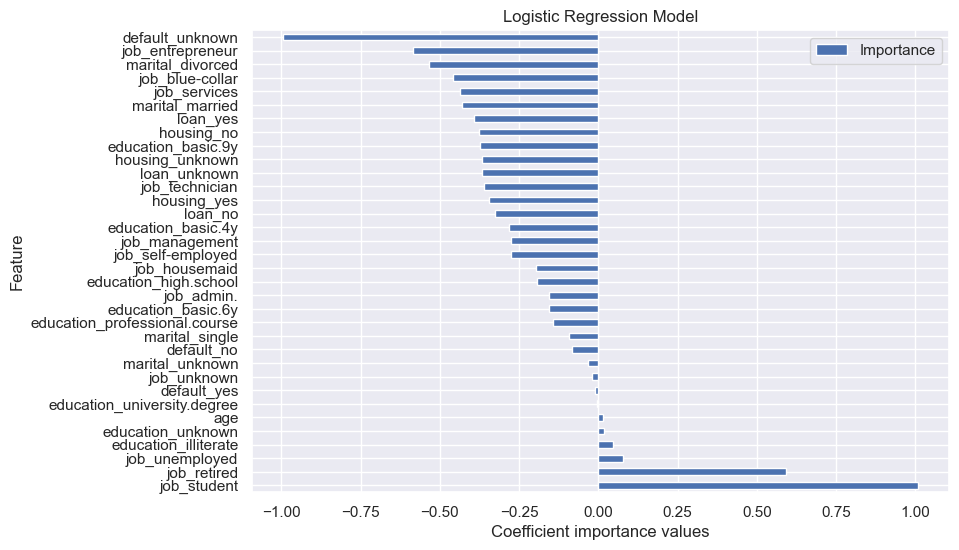

In [136]:
# plotting feature importance as a bar chart
tuned_logr_df.plot.barh(figsize=(9, 6))
plt.title("Logistic Regression Model")
plt.xlabel("Coefficient importance values")

In [124]:
# Tuned Decision Tree Feature Importance

tuned_DT_importance = pd.DataFrame({"Feature": X.columns, "Importance": tuned_DT.feature_importances_})
tuned_DT_importance = tuned_DT_importance.set_index("Feature")
tuned_DT_importance = tuned_DT_importance.sort_values('Importance', ascending =  False)
tuned_DT_importance

,Importance
Feature,
age,0.508787
default_no,0.304098
job_student,0.187116
loan_unknown,0.000000
loan_no,0.000000
housing_yes,0.000000
housing_unknown,0.000000
housing_no,0.000000
education_basic.9y,0.000000


Text(0.5, 0, 'Coefficient importance values')

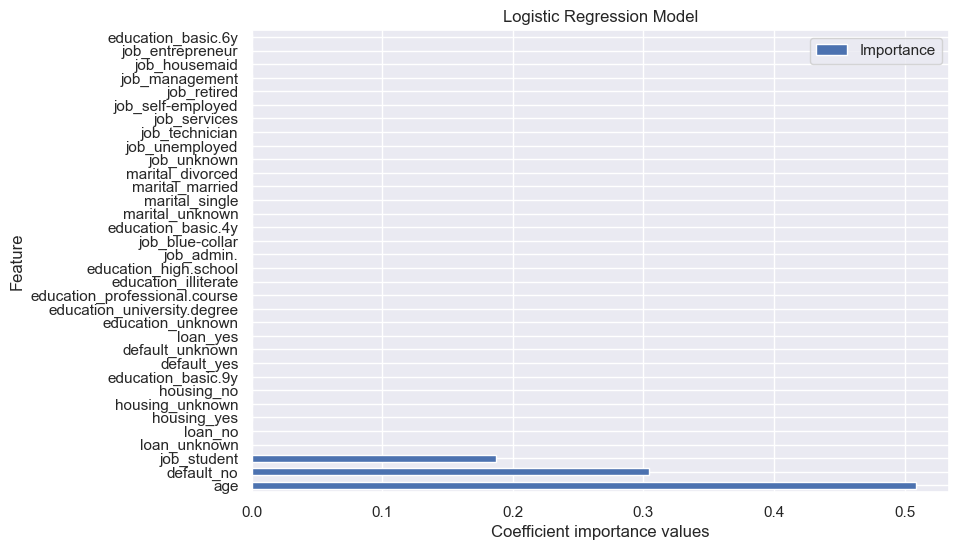

In [135]:
tuned_DT_importance.plot.barh(figsize=(9, 6))
plt.title("Logistic Regression Model")
plt.xlabel("Coefficient importance values")

[Text(0.5, 0.875, 'age <= 60.5\nentropy = 0.504\nsamples = 30882\nvalue = [27443, 3439]\nclass = No'),
 Text(0.25, 0.625, 'default_no <= 0.5\nentropy = 0.481\nsamples = 30200\nvalue = [27063, 3137]\nclass = No'),
 Text(0.125, 0.375, 'age <= 38.5\nentropy = 0.28\nsamples = 6393\nvalue = [6083, 310]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 0.334\nsamples = 2128\nvalue = [1997, 131]\nclass = No'),
 Text(0.1875, 0.125, 'entropy = 0.251\nsamples = 4265\nvalue = [4086, 179]\nclass = No'),
 Text(0.375, 0.375, 'job_student <= 0.5\nentropy = 0.526\nsamples = 23807\nvalue = [20980, 2827]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.51\nsamples = 23251\nvalue = [20613, 2638]\nclass = No'),
 Text(0.4375, 0.125, 'entropy = 0.925\nsamples = 556\nvalue = [367, 189]\nclass = No'),
 Text(0.75, 0.625, 'age <= 74.5\nentropy = 0.991\nsamples = 682\nvalue = [380, 302]\nclass = No'),
 Text(0.625, 0.375, 'age <= 63.5\nentropy = 0.976\nsamples = 479\nvalue = [283, 196]\nclass = No'),
 Text(0.5625, 0

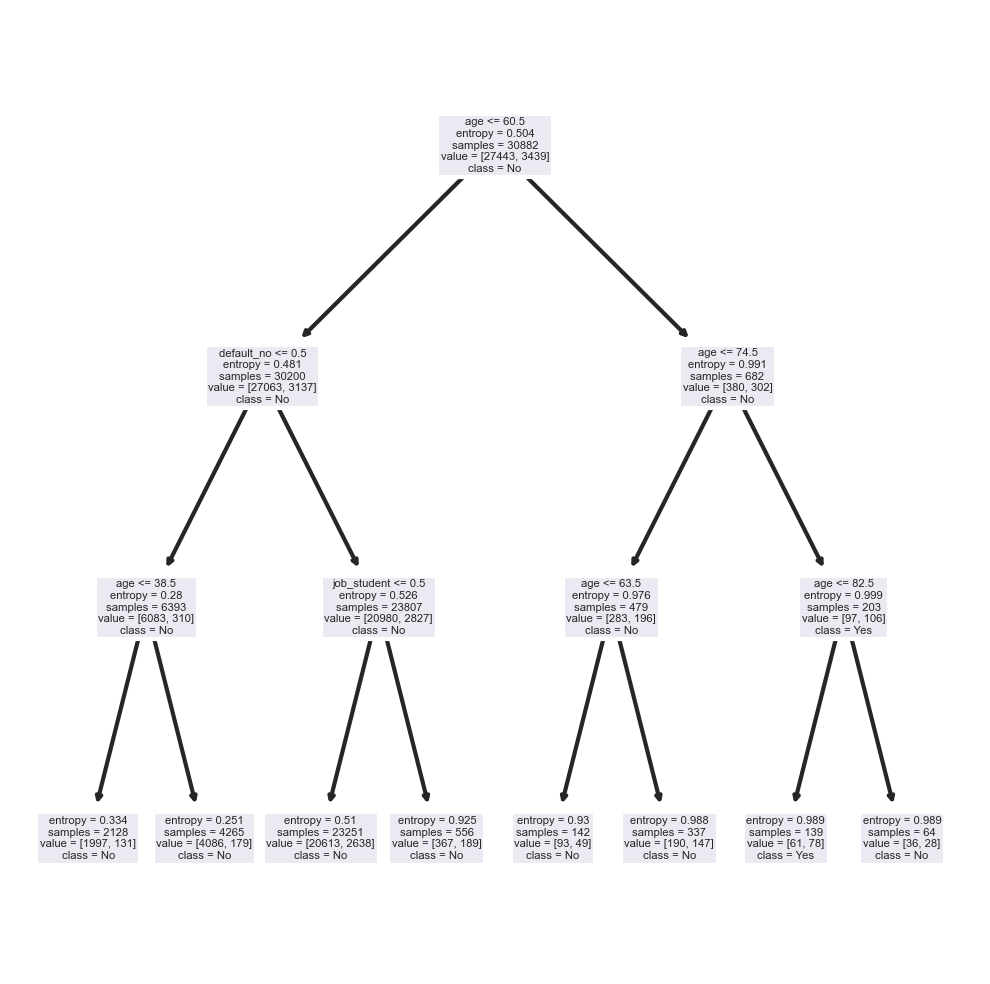

In [129]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(tuned_DT, feature_names = X.columns, class_names = ["No", "Yes"])

# Conclusion

After fine tuning the 4 different models and utilizing 2 different performance metrics, it seems that logistic regression is still the most reliable and accurate model for this database. Optimizing and tuning hyperparameters yielded an increase in accuracy and a higher ROC/AUC score for all models. Most significant would be the SVC model. Surprisingly, the baseline model for logistic regression and its fine-tuned counterpart did not show much difference in accuracy scores. In the future, tuning other logistic regression hyperparameters, utilizing gradient boosting, or focusing on more important features might yield higher scores.

These results show that the most important features when selecting candidates for a successful campaign are whether or not the subject is a student, retired, and their age. Logistic regression and decision tree models show that these features have the greatest influence on whether the targeting a marketing campaign is successful (subject agrees to a long term deposit subscription). This makes sense, as subjects who are retired, no longer go to school, and of an older age would be more likely to deposit money. These people most likely have the necessary funds to complete the transaction. Although this logic seems valid, these models can continually improve and results feature importance rankings can possibly change.

##### Questions